# Приоритизация гипотез. Анализ A/B-теста

# Содержание

- [Описание проекта](#1)
- [Общая информация о данных](#2)
- [Часть 1. Приоритизация гипотез](#3)
- [Часть 2. Анализ A/B-теста](#4)
- [Заключение](#6)

# Описание проекта <a id='1'></a>

**Цель: Приоритизировать гипотезы, проанализировать результаты A/B-теста.**

Путь к данным: 
- /datasets/hypothesis.csv. 
- /datasets/orders.csv. 
- /datasets/visitors.csv.

# Общая информация о данных <a id='2'></a>

# Часть 1. Приоритизация гипотез. <a id='3'></a>

Импортируем необходимые инструменты.

In [1]:
import pandas as pd
import datetime as dt 
import numpy as np 
import matplotlib.pyplot as plt 
from pandas.plotting import register_matplotlib_converters 
import warnings 
import scipy.stats as stats 
import math as mth 


Приоритизация гипотез фреймворком ICE.

Ознакомимся с данными.

In [2]:
data = pd.read_csv('/datasets/hypothesis.csv', sep=',')
orders = pd.read_csv('/datasets/orders.csv', sep=',') 
visitors = pd.read_csv('/datasets/visitors.csv', sep=',')

display(data)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


Приведем название колонок к "змеиному регистру". Добавим столбец ICE и отсортируем данные по убыванию.

In [3]:
data.columns = data.columns.str.lower().str.replace(' ', '_')
data['ICE'] = ((data['impact']*data['confidence'])/data['efforts'])  
display((data[['hypothesis', 'ICE']]).sort_values(by='ICE', ascending=False)) 

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день...",16.200000
0,"Добавить два новых канала привлечения трафика,...",13.333333
7,Добавить форму подписки на все основные страни...,11.200000
6,Показать на главной странице баннеры с актуаль...,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,7.000000
1,"Запустить собственную службу доставки, что сок...",2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",1.333333
3,"Изменить структура категорий, что увеличит кон...",1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",1.000000


Приоритизация гипотез фреймворком RICE. На первых местах гипотезы 8, 0. Добавим столбец RICE и отсортируем данные по убыванию, посмотрим как изменится картина.

In [4]:
data['RICE'] = ((data['reach']*data['impact']*data['confidence'])/data['efforts'])  
display((data[['hypothesis', 'ICE', 'RICE']]).sort_values(by='RICE', ascending=False)) 

,hypothesis,ICE,RICE
7,Добавить форму подписки на все основные страни...,11.200000,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,7.000000,56.0
0,"Добавить два новых канала привлечения трафика,...",13.333333,40.0
6,Показать на главной странице баннеры с актуаль...,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.200000,16.2
3,"Изменить структура категорий, что увеличит кон...",1.125000,9.0
1,"Запустить собственную службу доставки, что сок...",2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",1.000000,3.0


Применение фреймворка RICE вывело на первые позиции гипотезы по номерами 7, 2 вместо гипотез 8, 0 для фреймворка ICE. Это произошло из-за большего охвата пользователей которых затрагивает изменение (для гипотез 7, 2 Reach равен 10 и 8 против 3 и 1).

# Часть 2. Анализ A/B-теста <a id='4'></a>

Ознакомимся с данными.

In [5]:
display(orders)
print()
orders.info()
print()
display(visitors)
print()
visitors.info()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB



,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


В таблице с покупками 1197 строк, каждая из которых содержит данные о каждом заказе (transactionId) для каждого пользователя (visitorId). Незаполненных ячеек нет. В таблице с посетителями 62 строки, каждая из которых содержит данные о количестве посетителей (visitors) из конкретной группы(group) в конкретную дату августа 2019 года (date).

Дадим столбцам понятные названия.

In [6]:
orders.columns = ['orderId', 'userId', 'date', 'revenue', 'group']


Приведем данные в столбцах с датами к типу datetime.

In [7]:
orders['date'] = orders['date'].map( 
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d') 
) 
visitors['date'] = visitors['date'].map( 
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d') 
) 

Проверим наличие дубликатов в данных.

In [8]:
print('Дубликатов в таблице orders:', orders.duplicated().sum())
print('Дубликатов в таблице visitors:', visitors.duplicated().sum())


Дубликатов в таблице orders: 0
Дубликатов в таблице visitors: 0


Посчитаем сколько пользователей участвуют в тесте.

In [9]:
print(orders.agg( 
    {'userId': 'nunique'} 
))
print()
print(orders.groupby('group', as_index=False).agg( 
    {'userId': 'nunique'} 
))

userId    1031
dtype: int64

  group  userId
0     A     503
1     B     586


Пользователей в группах больше чем принявших участие в тесте. Найдем этих пользователей и операции которые они совершили.

In [10]:
Ausers = orders[orders['group']=='A'] 
Busers = orders[orders['group']=='B'] 
ABusers = Ausers.merge(Busers, left_on=['userId'], right_on=['userId'])
ABusersID = ABusers['userId'].drop_duplicates().sort_values()
display(ABusers.head(5)) 
print('Пересекающихся пользователей:', ABusersID.shape[0])   

,orderId_x,userId,date_x,revenue_x,group_x,orderId_y,date_y,revenue_y,group_y
0,2961555356,4069496402,2019-08-15,400,A,1473132782,2019-08-12,640,B
1,2223239646,199603092,2019-08-15,3488,A,437656952,2019-08-02,3488,B
2,62794304,199603092,2019-08-22,6976,A,437656952,2019-08-02,3488,B
3,2971973105,199603092,2019-08-27,2790,A,437656952,2019-08-02,3488,B
4,1941707234,199603092,2019-08-12,6438,A,437656952,2019-08-02,3488,B


Пересекающихся пользователей: 58


Всего в тесте приняло участие 1031 пользователей. При этом суммарное количество уникальных пользователей групп А и В превышает общее количество пользователей принявших участие в тесте, это указывает на то, что часть пользователей пересекается. И если бы идентификаторы пользователей (userId) были в двух исходных датафреймах, их необходимо было удалить из анализа. В противном случае их следуе оставить, - как минимум результаты расчета конверсии будут верны.

Создадим датафрейм с кумулятивными данными.

In [11]:
# создаем массив уникальных пар значений дат и групп теста 
datesGroups = orders[['date','group']].drop_duplicates() 

# получаем агрегированные кумулятивные по дням данные о заказах  
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )].agg({'date' : 'max', 'group' : 'max', 'orderId' : 'nunique',
                'userId' : 'nunique', 'revenue' : 'sum'}),
    axis=1
).sort_values(by=['date','group']) 

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина  
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1
).sort_values(by=['date','group']) 

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия 
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']) 

cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors'] 


Построим график кумулятивной выручки по группам.

''

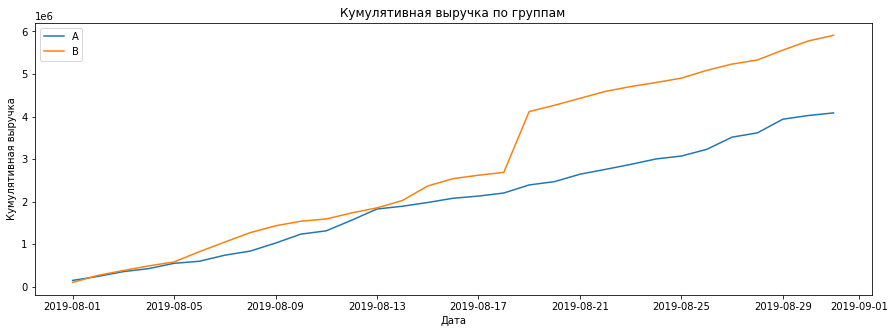

In [12]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А 
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']] 

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B 
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']] 

# задаем размер графика
plt.figure(figsize=(15, 5))

# Строим график выручки группы А 
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A') 

# Строим график выручки группы B 
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B') 

plt.xlabel('Дата')
plt.ylabel('Кумулятивная выручка') 
plt.title('Кумулятивная выручка по группам') 
plt.legend()
;

Выручка равномерно увеличивается в течение всего теста. Хороший знак. График выручки группы В в одной точке резко растёт (создаётся впечатление что группа В значительно лучше группы А). Это может сигнализировать о всплеске числа заказов, либо о появлении очень дорогих заказов в выборке. Проверим это позже. 

Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов. 

''

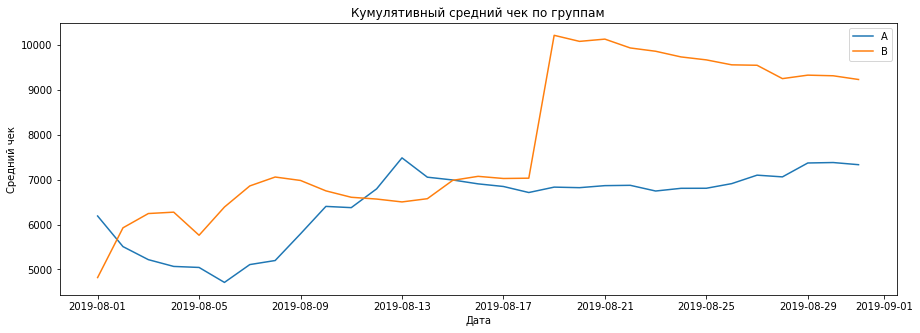

In [13]:
plt.figure(figsize=(15, 5))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A') 
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B') 

plt.xlabel('Дата')
plt.ylabel('Средний чек') 
plt.title('Кумулятивный средний чек по группам') 
plt.legend()
;

Средний чек в первой половине теста сильно колеблется и становится равномерным во второй половине теста. В середине теста средний чек группы В имеет резкий всплеск (возможно в группу B попали крупные заказы). После значительных колебаний среднего чека в первой половине теста (с общей тенденцией к росту в обеих группах) средний чек группы А сохранил рост, а в группе В наметилась тенденция по снижению среднего чека.

Построим график относительного различия для среднего чека. Добавим горизонтальную ось методом axhline(): 

''

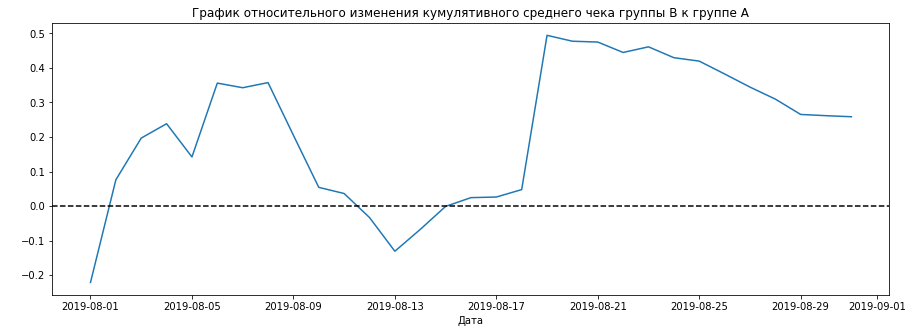

In [14]:
plt.figure(figsize=(15, 5))

# собираем данные в одном датафрейме 
mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B']) 
 
# cтроим отношение средних чеков 
plt.plot(mergedCumulativeRevenue['date'],
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1) 
 
plt.xlabel('Дата')
plt.ylabel(' ') 
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A') 

# добавляем ось X 
plt.axhline(y=0, color='black', linestyle='--')
;

В первой половине теста график различия среднего чека между сегментами резко «скачет». Вероятно это связано с наличием крупных заказы и выбросов. Вернёмся к ним позже. 

Проанализируем график кумулятивной конверсии. 

''

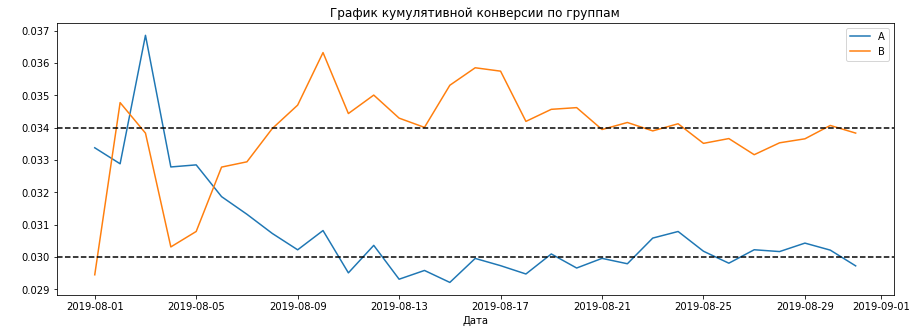

In [15]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors'] 
 
# отделяем данные по группе A 
cumulativeDataA = cumulativeData[cumulativeData['group']=='A'] 
 
# отделяем данные по группе B 
cumulativeDataB = cumulativeData[cumulativeData['group']=='B'] 

plt.figure(figsize=(15, 5))

# строим графики 
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A') 
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B') 

plt.xlabel('Дата')
plt.ylabel(' ') 
plt.title('График кумулятивной конверсии по группам') 
plt.legend()
plt.axhline(y=0.034, color='black', linestyle='--')
plt.axhline(y=0.03, color='black', linestyle='--')
;

В начале теста конверсии значительно колебались около одного значения, но затем конверсия группы В вырвалась вперёд и со второй половины теста наметилась тенденция к её снижению, а конверсия группы А просела и зафиксировалась. 

Построим график относительного различия кумулятивных конверсий.

''

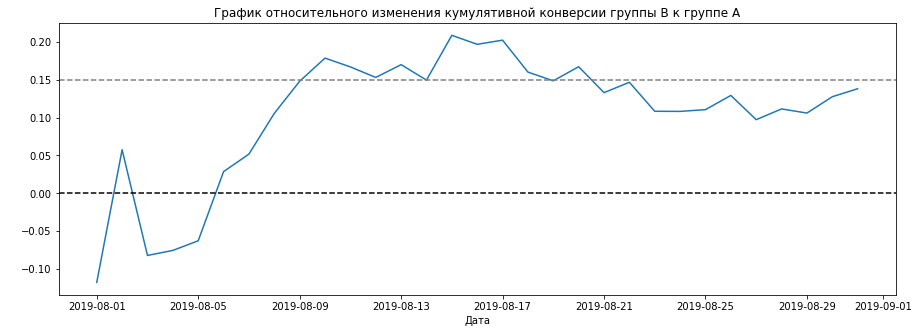

In [16]:
mergedCumulativeConversions = cumulativeDataA[
    ['date','conversion']].merge(
    cumulativeDataB[
        ['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B']) 

plt.figure(figsize=(15, 5))

plt.plot(mergedCumulativeConversions['date'],
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1) 

plt.xlabel('Дата')
plt.ylabel(' ') 
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A') 

plt.axhline(y=0, color='black', linestyle='--') 
plt.axhline(y=0.15, color='grey', linestyle='--')
;

В начале теста группа B проигрывала группе A, затем вырвалась вперёд. Потом её конверсия снова падала, но теперь постепенно растёт. Сейчас делать какие-либо выводы по тесту рано. Возможно после анализа аномалий ситуация изменится.

Построим точечный график количества заказов по пользователям.

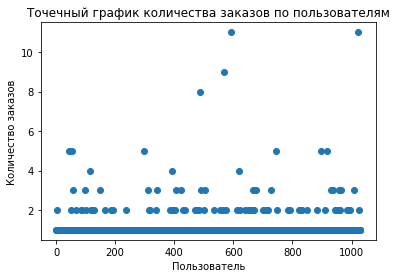

In [17]:
ordersByUsers = ( 
    orders.groupby('userId', as_index=False) 
    .agg({'orderId': 'nunique'}) 
) 
 
ordersByUsers.columns = ['userId', 'orders'] 


x_values = pd.Series(range(0,len(ordersByUsers))) 
 
plt.scatter(x_values, ordersByUsers['orders']) 

plt.xlabel('Пользователь')
plt.ylabel('Количество заказов') 
plt.title('Точечный график количества заказов по пользователям') ;

Из графика видно что, много пользователей с 1-2 заказами. Их точная доля не ясна — непонятно, считать их аномалиями или нет. 

Посчитаем 95-й и 99-й перцентили количества заказов на одного пользователя.

In [18]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))


[2. 4.]


Не более 5% пользователей оформляли больше 2 заказов. И 1% пользователей заказывали более 4 раз. 

Разумно выбрать 2 заказа на одного пользователя за верхнюю границу числа заказов, и отсеять 5% аномальных пользователей по ней.

In [19]:
por = np.percentile(ordersByUsers['orders'], [95])

Построим точечный график стоимостей заказов.

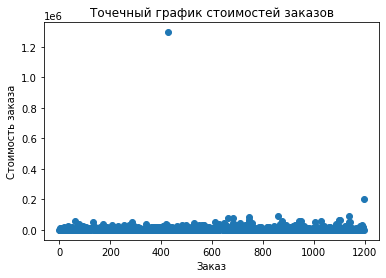

In [20]:
x_values = pd.Series(range(0,len(orders['revenue']))) 
plt.scatter(x_values, orders['revenue'])

plt.xlabel('Заказ')
plt.ylabel('Стоимость заказа') 
plt.title('Точечный график стоимостей заказов') ;

График слабо информативен. Исключим самые сильные выбросы установив масштаб осей.

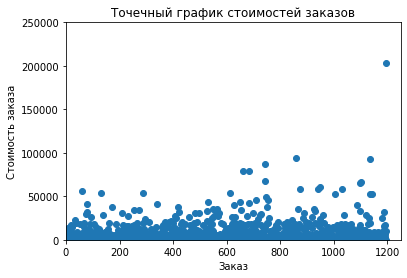

In [21]:
x_values = pd.Series(range(0,len(orders['revenue']))) 
plt.scatter(x_values, orders['revenue'])

plt.axis([0, 1250, 0, 250000]) 
plt.xlabel('Заказ')
plt.ylabel('Стоимость заказа') 
plt.title('Точечный график стоимостей заказов') ;

Как и предполагали: в данных есть аномально большие заказы. По графику видно, что свыше 50000 р. заказы единичны. Однако принято отсеивать от 1% до 5% наблюдений с крайними значениями. 
Посчитаем 95-й и 99-й перцентили стоимостей заказов.

In [22]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


Не более 5% заказов дороже 28000 рублей и не более 1% дороже 58233.2 рублей. За верхнюю гарницу примем заказ дороже 40 000 рублей. Так мы уберём от 1% до 5% пользователей с дорогими заказами.

Рассчитаем статистическую значимость различий в конверсии между группами по «сырым» данным. Для этого подготовим данные.

In [23]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']] 
visitorsADaily.columns = ['date', 'visitorsPerDateA'] 
 
visitorsACummulative = visitorsADaily.apply( 
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg( 
        {'date': 'max', 'visitorsPerDateA': 'sum'} 
    ), 
    axis=1, 
) 
visitorsACummulative.columns = ['date', 'visitorsCummulativeA'] 
 
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']] 
visitorsBDaily.columns = ['date', 'visitorsPerDateB'] 
 
visitorsBCummulative = visitorsBDaily.apply( 
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg( 
        {'date': 'max', 'visitorsPerDateB': 'sum'} 
    ), 
    axis=1, 
) 
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB'] 
 
ordersADaily = ( 
    orders[orders['group'] == 'A'][['date', 'orderId', 'userId', 'revenue']] 
    .groupby('date', as_index=False) 
    .agg({'orderId': pd.Series.nunique, 'revenue': 'sum'}) 
) 
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA'] 
 
ordersACummulative = ordersADaily.apply( 
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg( 
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'} 
    ), 
    axis=1, 
).sort_values(by=['date']) 
ordersACummulative.columns = [ 
    'date', 
    'ordersCummulativeA', 
    'revenueCummulativeA', 
] 
 
ordersBDaily = ( 
    orders[orders['group'] == 'B'][['date', 'orderId', 'userId', 'revenue']] 
    .groupby('date', as_index=False) 
    .agg({'orderId': pd.Series.nunique, 'revenue': 'sum'}) 
) 
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB'] 
 
ordersBCummulative = ordersBDaily.apply( 
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg( 
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'} 
    ), 
    axis=1, 
).sort_values(by=['date']) 
ordersBCummulative.columns = [ 
    'date', 
    'ordersCummulativeB', 
    'revenueCummulativeB', 
] 
 
data = ( 
    ordersADaily.merge( 
        ordersBDaily, left_on='date', right_on='date', how='left' 
    ) 
    .merge(ordersACummulative, left_on='date', right_on='date', how='left') 
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left') 
    .merge(visitorsADaily, left_on='date', right_on='date', how='left') 
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left') 
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left') 
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left') 
) 


Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни. 

Переменная sampleA будет состоять из двух частей: 

Список с количеством заказов для каждого из пользователей: ordersByUsersA['orders']. 

Нули для пользователей, которые ничего не заказывали. Их количество равно разнице между суммой посетителей и количеством записей о заказах: data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders']).  

In [24]:
ordersByUsersA = ( 
    orders[orders['group'] == 'A'] 
    .groupby('userId', as_index=False) 
    .agg({'orderId': pd.Series.nunique}) 
) 
ordersByUsersA.columns = ['userId', 'orders'] 
 
ordersByUsersB = ( 
    orders[orders['group'] == 'B'] 
    .groupby('userId', as_index=False) 
    .agg({'orderId': pd.Series.nunique}) 
) 
ordersByUsersB.columns = ['userId', 'orders'] 
 
sampleA = pd.concat( 
    [ 
        ordersByUsersA['orders'], 
        pd.Series( 
            0, 
            index=np.arange( 
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders']) 
            ), 
            name='orders', 
        ), 
    ], 
    axis=0, 
) 
 
sampleB = pd.concat( 
    [ 
        ordersByUsersB['orders'], 
        pd.Series( 
            0, 
            index=np.arange( 
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders']) 
            ), 
            name='orders', 
        ), 
    ], 
    axis=0, 
) 

Рассчитаем статистическую значимость различий в конверсии между группами по «сырым» данным.
Сформулируем гипотезы. Нулевая: различий в конверсии между группами нет. Альтернативная: различия в конверсии между группами есть. Примем уровень alpha = 5%. Применим статистический критерий Манна-Уитни к полученным выборкам: 


In [25]:
print('P-value =', "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('Относительное увеличение в конверсии = ', '{0:.3f}'.format(sampleB.mean()/sampleA.mean()-1))

P-value = 0.017
Относительное увеличение в конверсии =  0.138


P-value=0,017 меньше 0.05. Значит, по сырым данным нулевую гипотезу можно было бы отвергнуть и считать,что различия в конверсии между группами есть. Относительное увеличение в конверсии почти 14%.

Теперь проверим статистическую значимость различий в среднем чеке между группами. Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть. Примем уровень alpha = 5%.

Чтобы рассчитать статистическую значимость различий в среднем чеке, передадим критерию mannwhitneyu() данные о выручке с заказов. Найдём также относительные различия в среднем чеке между группами: 



In [26]:
print('P-value =', '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1])) 
print('Относительное различие в среднем чеке между группами =', '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

P-value = 0.729
Относительное различие в среднем чеке между группами = 0.259


P-value = 0.729 значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. При этом однако, средний чек группы B значительно больше среднего чека группы A. Возможно такое большое различие вызвано наличием аномальных значений.

Рассчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным. Сформулируем гипотезы. Нулевая: различий в конверсии между группами нет. Альтернативная: различия в конверсии между группами есть. 

Отметим, что расчитанные ранее 95-й и 99-й перцентили средних чеков равны 28000 и 58233.2 рублям. А 95-й и 99-й перцентили количества заказов на одного пользователя равны 2 и 4 заказа на пользователя. 

Примем за аномальных пользователей тех, кто совершил от 2 заказов или совершил заказ дороже 40 000 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders и пользователей, совершивших заказы дороже 40 000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers. 

Узнаем, сколько всего аномальных пользователей атрибутом shape. 

In [27]:
usersWithManyOrders = pd.concat( 
    [ 
        ordersByUsersA[ordersByUsersA['orders'] > por[0]]['userId'], 
        ordersByUsersB[ordersByUsersB['orders'] > por[0]]['userId'], 
    ], 
    axis=0, 
) 
usersWithExpensiveOrders = orders[orders['revenue'] > 40000]['userId'] 
abnormalUsers = ( 
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0) 
    .drop_duplicates() 
    .sort_values() 
) 

display(abnormalUsers.head(5)) 

print('Аномальных пользователей:', abnormalUsers.shape[0])   

1099    148427295
18      199603092
23      237748145
37      249864742
684     358944393
Name: userId, dtype: int64

Аномальных пользователей: 45


Всего 45 аномальных пользователей. 

Узнаем, как их действия повлияли на результаты теста. Подготовим выборки количества заказов по пользователям по группам теста. Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. 

In [28]:
sampleAFiltered = pd.concat( 
    [ 
        ordersByUsersA[ 
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers)) 
        ]['orders'], 
        pd.Series( 
            0, 
            index=np.arange( 
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders']) 
            ), 
            name='orders', 
        ), 
    ], 
    axis=0, 
) 
 
sampleBFiltered = pd.concat( 
    [ 
        ordersByUsersB[ 
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers)) 
        ]['orders'], 
        pd.Series( 
            0, 
            index=np.arange( 
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders']) 
            ), 
            name='orders', 
        ), 
    ], 
    axis=0, 
)

print('P-value =', '{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительное увеличение конверсии =', '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))


P-value = 0.007
Относительное увеличение конверсии = 0.188


После удаления аномальных значений P-value=0,007 - значительно меньше 0.05. Значит можно отвергнуть нулевую гипотезу и считать, что в конверсии есть различия. Относительное увеличение конверсии почти 19%.

Рассчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

In [29]:
usersWithManyOrders = pd.concat( 

    [ 

        ordersByUsersA[ordersByUsersA['orders'] > por[0]]['userId'], 

        ordersByUsersB[ordersByUsersB['orders'] > por[0]]['userId'], 

    ], 

    axis=0, 

) 

usersWithExpensiveOrders = orders[orders['revenue'] > 40000]['userId'] 

abnormalUsers = ( 

    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0) 

    .drop_duplicates() 

    .sort_values() 

) 

  
print('P-value =', '{0:.3f}'.format( 

        stats.mannwhitneyu( 

            orders[ 

                np.logical_and( 

                    orders['group'] == 'A', 

                    np.logical_not(orders['userId'].isin(abnormalUsers)), 

                ) 

            ]['revenue'], 

            orders[ 

                np.logical_and( 

                    orders['group'] == 'B', 

                    np.logical_not(orders['userId'].isin(abnormalUsers)), 

                ) 

            ]['revenue'], 

        )[1] 

    ) 

) 

  

print('Относительное изменение среднего чека =', "{0:.3f}".format( 

        orders[ 

            np.logical_and( 

                orders['group'] == 'B', 

                np.logical_not(orders['userId'].isin(abnormalUsers)), 

            ) 

        ]['revenue'].mean() 

        / orders[ 

            np.logical_and( 

                orders['group'] == 'A', 

                np.logical_not(orders['userId'].isin(abnormalUsers)), 

            ) 

        ]['revenue'].mean() 

        - 1 

    ) 

)  

P-value = 0.944
Относительное изменение среднего чека = 0.058


После устранения аномалий P-value стал еще больше. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. При этом также, после устранения аномалий, различие среднего чека между группами уменьшилось почти в 5 раз (а при фильтрации 5% данных (средний чек не более 28000) группа А даже несколько опережает группу В).

# Заключение <a id='6'></a>

Часть 1. Приоритизация гипотез.

Применение фреймворка RICE вывело на первые позиции гипотезы по номерами 7, 2 вместо гипотез 8, 0 для фреймворка ICE. Это произошло из-за большего охвата пользователей которых затрагивает изменение (для гипотез 7, 2 Reach равен 10 и 8 против 3 и 1).

Часть 2. Анализ A/B-теста

Имеющиеся факты: 

Есть статистически значимое различие по конверсии между группами как по «сырым», так и по данным после фильтрации аномалий; 

Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий; 

График различия конверсии между группами сообщает, что результаты группы B лучше группы A, относительное изменение почти 19%.

**Исходя из обнаруженных фактов, тест следует остановить и зафиксировать победу группы В. Предложенные изменения для группы B оправдали себя и способствовали увеличению конверсии.** 
